<div style="border: 1px solid black">
<b><center><font size="3">Data Acquisition</font></center></b>

<b><center><font size="2">Web Scraping Project</font></center></b>
</div>

**Notebook Developed by**: Rene Jerez </b>

**Notebook Co-writer by**: ChatGPT </b>

**Notebook Based on**: [Ricardo Campos](https://www.di.ubi.pt/~rcampos)<br>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span>
<a href="#Informação de uma página web estática 1" data-toc-modified-id="Informação de uma página web estática 1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Informação de uma página web estática</a></span></span></li>
<li><span>
<a href="#Informação de uma página web dinâmica 2" data-toc-modified-id="Informação de uma página web dinâmica 2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Informação de uma página web dinâmica</a></span>


### 1. Informação de uma página web estática

Obter melhores preços de tickets aereos da Companhia RyanAir com origem no Aeroporto do Porto

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import logging

In [3]:
# logging settings
logging.basicConfig(level=logging.INFO)

In [21]:
########################################
# Make a URL variable
########################################

# Base URL
base_url = 'https://www.ryanair.com/gb/en/cheap-flights-beta'

# Query parameters
payload = {
    'originIata': 'OPO',
    'destinationIata': 'ANY',
    'isReturn': 'true',
    'isMacDestination': 'false',
    'promoCode': '',
    'adults': '1',
    'teens': '0',
    'children': '0',
    'infants': '0',
    'dateOut': '2024-04-01',
    'dateIn': '2024-04-30',
    'daysTrip': '3',
    'dayOfWeek': 'FRIDAY',
    'isExactDate': 'false',
    'outboundFromHour': '00:00',
    'outboundToHour': '23:59',
    'inboundFromHour': '00:00',
    'inboundToHour': '23:59',
    'priceValueTo': '',
    'currency': 'EUR',
    'isFlexibleDay': 'false'
}

# Encode parameters
query_string = urlencode(payload)

# Full URL
ryanair_url = f"{base_url}?{query_string}"


In [29]:
def ryanair_url_maker(airport_origin, start_date, finish_date):
    base_url = 'https://www.ryanair.com/gb/en/cheap-flights-beta'
    payload = {
        'originIata': airport_origin,
        'destinationIata': 'ANY',
        'isReturn': 'true',
        'isMacDestination': 'false',
        'promoCode': '',
        'adults': '1',
        'teens': '0',
        'children': '0',
        'infants': '0',
        'dateOut': start_date,
        'dateIn': finish_date,
        'daysTrip': '3',
        'dayOfWeek': 'FRIDAY',
        'isExactDate': 'false',
        'outboundFromHour': '00:00',
        'outboundToHour': '23:59',
        'inboundFromHour': '00:00',
        'inboundToHour': '23:59',
        'priceValueTo': '',
        'currency': 'EUR',
        'isFlexibleDay': 'false'
    }
    query_string = urlencode(payload)
    return f"{base_url}?{query_string}"

In [32]:
ryanair_url = ryanair_url_maker(
                                airport_origin='OPO', 
                                start_date='2024-04-01', 
                                finish_date='2024-04-30')
# Process info
logging.info("URL created")


2024-04-02 23:12:16,854 - INFO - URL created


In [22]:
########################################
# Selenium Exraction
########################################

# Initialize WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open URL
driver.get(ryanair_url)

# Process info
logging.info("Start extracting content")

# Wait
time.sleep(60)

# Extract info
page_content = driver.page_source


# Save info in html file
with open('page.html', 'w', encoding='utf-8') as f:
    f.write(page_content)

driver.quit()

2024-04-02 22:45:15,864 - INFO - ====== WebDriver manager ======
2024-04-02 22:45:17,068 - INFO - Get LATEST chromedriver version for google-chrome
2024-04-02 22:45:17,902 - INFO - Get LATEST chromedriver version for google-chrome
2024-04-02 22:45:18,913 - INFO - Driver [C:\Users\rene_\.wdm\drivers\chromedriver\win64\123.0.6312.86\chromedriver-win32/chromedriver.exe] found in cache
2024-04-02 22:46:26,954 - INFO - Start extracting content


In [23]:
########################################
# Find destinations in the full content
########################################

# Load HTML file
with open('page.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse with Soup
soup = BeautifulSoup(html_content, 'html.parser')

# Find destinations classes
elements = soup.find_all(class_='country-card__content')
all_elements_html = ""


# Check if any elements were found
if elements:
    for element in elements:
        # Convert to a string
        element_html = str(element)

        # Append all elements
        all_elements_html += element_html + "\n\n"
        
else:
    print("No destinations classes found.")


# Save file 'destinations.html'
if all_elements_html:
    with open('destinations.html', 'w', encoding='utf-8') as f:
        f.write(all_elements_html)
    print("File 'destinations.html' has been created with the extracted content.")
    
else:
    print("No content to write to 'destinations.html'.")

File 'destinations.html' has been created with the extracted content.


In [26]:
########################################
# Convert from HTML to Dataframe
########################################

# Load HTML file
with open('destinations.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse HTML with Soup
soup = BeautifulSoup(html_content, 'html.parser')

# Info we need
countries = []
dates = []
prices = []

# Find destinations
elements = soup.find_all(class_='country-card__content')

# Select informations about Country, Date and Price
for element in elements:
    # Country
    country = element.find(class_='country-card__country').text.strip()
    countries.append(country)
    
    # Date
    date_info = element.find(class_='b2').text.strip()
    dates.append(date_info)
    
    # Price
    price = element.find(class_='country-card__price').text.strip()
    prices.append(price)

# Final dataframe
df_ryanair = pd.DataFrame({
    'Country': countries,
    'Date Info': dates,
    'Price': prices
})

In [27]:
########################################
# Flights Recommendations
########################################
df_ryanair

,Country,Date Info,Price
0,Portugal 3 days in April,3 days in April,€94.57
1,Morocco 3 days in April,3 days in April,€105.04
2,Spain 3 days in April,3 days in April,€122.88
3,United Kingdom 3 days in April,3 days in April,€123.88
4,France 3 days in April,3 days in April,€171.37
5,Hungary 3 days in April,3 days in April,€191.62
6,Belgium 3 days in April,3 days in April,€239.30


### 2. Informação de uma página web Dinâmica

Obter Contratos Publicos recentes de origem da Covilhã

In [16]:
def contratos_publicos(pais:'187', distrito:'6', concelho:'68', desdedatacontrato: '2024-03-01', atedatacontrato:'2024-03-31'):
    # Base URL
    base_url = 'https://www.base.gov.pt/Base4/pt/pesquisa/'

    # Query parameters
    payload = {
                'type':'contratos',
                'texto':'',
                'tipo':'0',
                'tipocontrato':'0',
                'cpv':'',
                'aqinfo':'',
                'adjudicante':'',
                'adjudicataria':'',
                'sel_price':'price_c1',
                'desdeprecocontrato':'',
                'ateprecocontrato':'',
                'desdeprecoefectivo':'',
                'ateprecoefectivo':'',
                'desdeprazoexecucao':'',
                'ateprazoexecucao':'',
                'sel_date':'date_c1',
                'desdedatacontrato':desdedatacontrato,
                'atedatacontrato':atedatacontrato,
                'desdedatapublicacao':'',
                'atedatapublicacao':'',
                'desdedatafecho':'',
                'atedatafecho':'',
                'pais': pais,
                'distrito': distrito,
                'concelho':concelho
    }

    # Encode parameters
    query_string = urlencode(payload)

    # Full URL
    url_covilha = f"{base_url}?{query_string}"
    
    
    ########################################
    # Extract content from website
    ########################################

    # Initialize WebDriver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

    # Open URL
    driver.get(url_covilha)

    # Process info
    print("Start extracting content")

    # Wait
    time.sleep(30)

    # Locate the table
    table = driver.find_element(By.CLASS_NAME, 'table-striped')

    # Assuming headers are in the first row
    headers = [th.text for th in table.find_elements(By.TAG_NAME, "th")]
    print("Set headers")

    overall_dict = {}
    for index, row in enumerate(table.find_elements(By.TAG_NAME, "tr")[1:], start=1):
        cells = row.find_elements(By.TAG_NAME, "td")
        row_dict = {headers[i]: cell.text for i, cell in enumerate(cells)}
        overall_dict[f"row_{index}"] = row_dict

    print("Finish extraction")

    # Close the browser
    driver.quit()
    
    
    ########################################
    # Convert from dictionary to dataframe
    ########################################
    df_rows = pd.DataFrame.from_dict(overall_dict, orient='index')
    
    print("Returning dataframe")
    return df_rows


In [ ]:
# Generate date range
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Initialize an empty DataFrame
covilha = pd.DataFrame()

for date in date_range:
    params = {
        'pais': '187',
        'distrito': '6',
        'concelho': '68',
        'desdedatacontrato': date.strftime('%Y-%m-%d'),
        'atedatacontrato': date.strftime('%Y-%m-%d')  # Same day
    }
    try:
        df = contratos_publicos(**params)
        covilha = pd.concat([covilha, df], ignore_index=True)
    except Exception as e:
        print(f"Error for period starting {params['desdedatacontrato']}: {e}")
        continue


In [22]:
covilha['Preço contratual'] = covilha['Preço contratual'].apply(lambda x: float(x.replace('€', '').replace('.', '').replace(',', '.')))


In [24]:
covilha.dtypes

Objeto do contrato       object
Tipo de procedimento     object
Adjudicante              object
Adjudicatário            object
Preço contratual        float64
Publicação               object
                         object
dtype: object

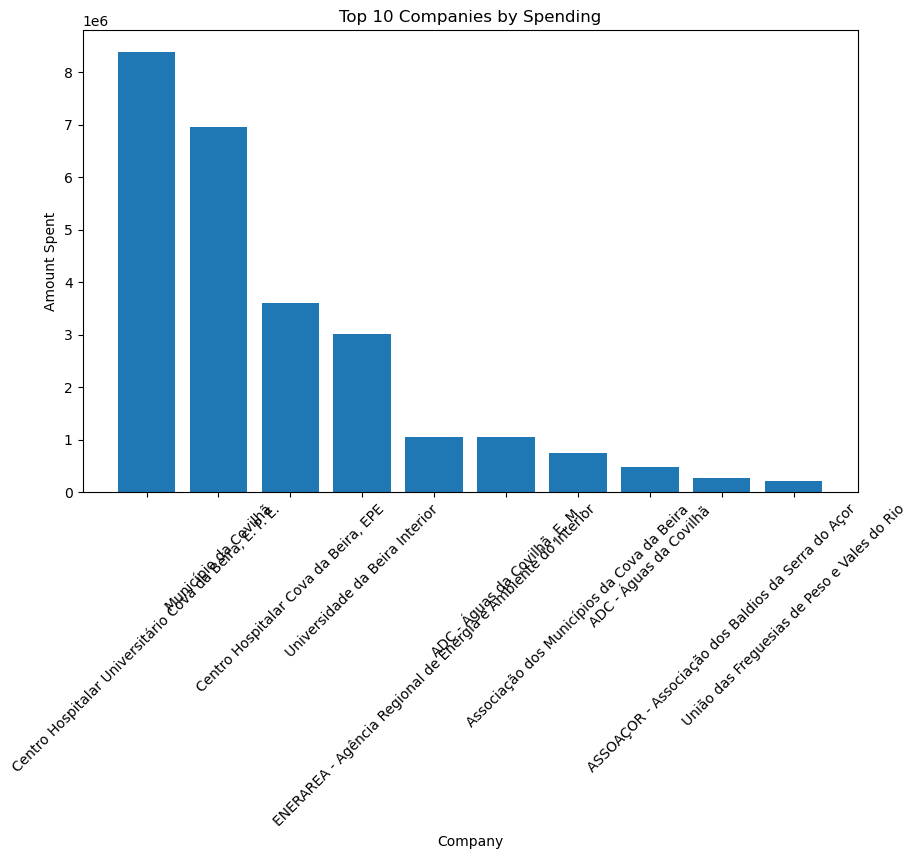

In [33]:
# Convert 'Preço contratual' to numerical format first, if not already done

# Sum and sort to find top companies by spending
total_spent = covilha.groupby('Adjudicante')['Preço contratual'].sum().reset_index()
top_companies = total_spent.sort_values('Preço contratual', ascending=False).head(10)  # Descending order for top spenders

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_companies['Adjudicante'], top_companies['Preço contratual'])
plt.xlabel('Company')
plt.ylabel('Amount Spent')
plt.title('Top 10 Companies by Spending')
plt.yscale('linear')
plt.xticks(rotation=45)
plt.show()


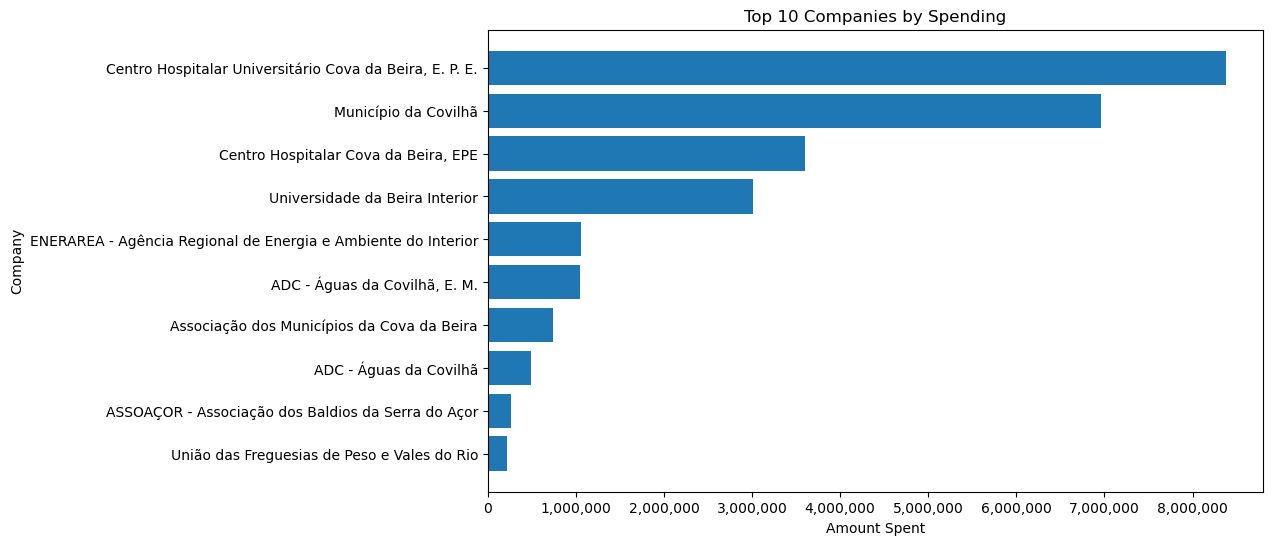

In [41]:
# Reverse the DataFrame to display bars in descending order
top_companies_reversed = top_companies.iloc[::-1]

plt.figure(figsize=(10, 6))
plt.barh(top_companies_reversed['Adjudicante'], top_companies_reversed['Preço contratual'])
plt.ylabel('Company')
plt.xlabel('Amount Spent')
plt.title('Top 10 Companies by Spending')
plt.yticks(fontsize=10)  # Adjust the fontsize as needed for y-axis (company names)

# Format x-axis to plain format
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()


In [30]:
total_spent.head(10)

,Adjudicante,Preço contratual
0,ADC - Águas da Covilhã,487677.75
1,"ADC - Águas da Covilhã, E. M.",1049052.22
2,ANIMAR - Associação Portuguesa para o Desenvol...,7334.64
3,ASSOAÇOR - Associação dos Baldios da Serra do ...,265723.84
4,"Administração Regional de Saúde do Centro, I. P.",2014.38
5,"Agrupamento de Escolas Pêro da Covilhã, Covilhã",29111.87
6,Agência Nacional para a Gestão do Programa Era...,52083.29
7,"Associação Empresarial da Covilhã, Belmonte e ...",3900.00
8,Associação de Agrupamentos de Baldios Estrela Sul,27500.00
9,"Associação de Socorros Mútuos ""Mutualista Covi...",10000.00


In [31]:
top_companies

,Adjudicante,Preço contratual
15,"Centro Hospitalar Universitário Cova da Beira,...",8377672.88
40,Município da Covilhã,6959765.71
14,"Centro Hospitalar Cova da Beira, EPE",3602597.10
50,Universidade da Beira Interior,3010328.21
28,ENERAREA - Agência Regional de Energia e Ambie...,1059175.43
1,"ADC - Águas da Covilhã, E. M.",1049052.22
10,Associação dos Municípios da Cova da Beira,745001.90
0,ADC - Águas da Covilhã,487677.75
3,ASSOAÇOR - Associação dos Baldios da Serra do ...,265723.84
54,União das Freguesias de Peso e Vales do Rio,213183.72
